In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
# Modelo logístico de Verhulst
def modelo_logistico(t, P0, r, K):
    return K / (1 + ((K - P0)/P0) * np.exp(-r * t))

In [71]:
dados_censo = pd.DataFrame({
    "ano": [2010, 2022],
    "populacao": [119313, 150470]
})

dados_censo["t"] = dados_censo["ano"] - 2010
t_censo = dados_censo["t"].values
P_censo = dados_censo["populacao"].values
P0_censo = P_censo[0]

dados_censo

,ano,populacao,t
0,2010,119313,0
1,2022,150470,12


In [82]:
param_censo, _ = curve_fit(lambda t, r, K: modelo_logistico(t, P0_censo, r, K), t_censo, P_censo, bounds=(0, [1.0, 1e6]))
r_censo, K_censo = param_censo

print(f"Taxa de crescimento r: {r_otimo:.6f}")
print(f"Capacidade de suporte K: {K_otimo:.0f}")

Taxa de crescimento r: 0.157774
Capacidade de suporte K: 157774


/tmp/ipykernel_39386/3179031224.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  param_censo, _ = curve_fit(lambda t, r, K: modelo_logistico(t, P0_censo, r, K), t_censo, P_censo, bounds=(0, [1.0, 1e6]))


In [ ]:
anos_proj_censo = np.arange(2023, 2036)
t_proj_censo = anos_proj_censo - 2010
pop_proj_censo = modelo_logistico(t_proj_censo, P0_censo, r_censo, K_censo).astype(int)

tabela_proj_censo = pd.DataFrame({
    "ano": anos_proj_censo,
    "populacao": pop_proj_censo
})

tabela_proj_censo

,ano,populacao
0,2023,151493
1,2024,152378
2,2025,153143
3,2026,153801
4,2027,154369
5,2028,154856
6,2029,155275
7,2030,155635
8,2031,155943
9,2032,156208


In [75]:
df = pd.read_csv("estimativa_populacao_toledo.csv")

df["t"] = df["ano"] - df["ano"].min()
t_sidra = df["t"].values
P_sidra = df["populacao"].values
P0_sidra = P_sidra[0]

df.head()

,ano,populacao,t
0,2001,99655,0
1,2002,100715,1
2,2003,101882,2
3,2004,104332,3
4,2005,105687,4


In [86]:
param_sidra, _ = curve_fit(lambda t, r, K: modelo_logistico(t, P0_sidra, r, K), t_sidra, P_sidra, bounds=(0, [1.0, 1e6]))
r_sidra, K_sidra = param_sidra

print(f"Taxa de crescimento r (SIDRA): {r_sidra:.6f}")
print(f"Capacidade de suporte K (SIDRA): {K_sidra:.0f}")

Taxa de crescimento r (SIDRA): 0.022105
Capacidade de suporte K (SIDRA): 1000000


In [78]:
anos_proj_sidra = np.arange(df["ano"].min(), 2036)
t_proj_sidra = anos_proj_sidra - df["ano"].min()
pop_proj_sidra = modelo_logistico(t_proj_sidra, P0_sidra, r_sidra, K_sidra).astype(int)

tabela_proj_sidra = pd.DataFrame({
    "ano": anos_proj_sidra,
    "populacao": pop_proj_sidra
})

tabela_proj_sidra

,ano,populacao
0,2001,99655
1,2002,101655
2,2003,103692
3,2004,105764
4,2005,107873
5,2006,110019
6,2007,112202
7,2008,114423
8,2009,116682
9,2010,118980


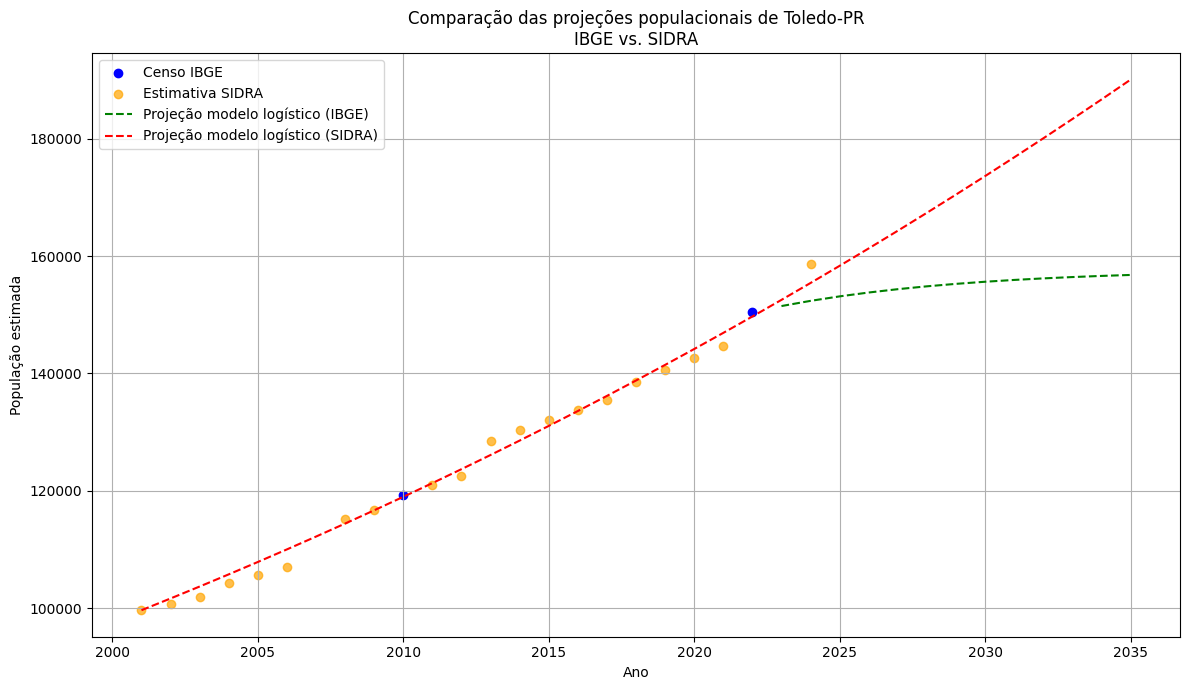

In [87]:
plt.figure(figsize=(12, 7))
plt.scatter(dados_censo["ano"], dados_censo["populacao"], color="blue", label="Censo IBGE")
plt.scatter(df["ano"], df["populacao"], color="orange", label="Estimativa SIDRA", alpha=0.7)
plt.plot(tabela_proj_censo["ano"], tabela_proj_censo["populacao"], color="green", linestyle="--", label="Projeção modelo logístico (IBGE)")
plt.plot(tabela_proj_sidra["ano"], tabela_proj_sidra["populacao"], color="red", linestyle="--", label="Projeção modelo logístico (SIDRA)")
plt.title("Comparação das projeções populacionais de Toledo-PR\nIBGE vs. SIDRA")
plt.xlabel("Ano")
plt.ylabel("População estimada")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("comparacao_projecoes_toledo.png", dpi=300)
plt.show()